In [1]:
import json

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from stellarpunk import util

In [2]:
df_base = pd.json_normalize(list(json.loads(line) for line in open("/tmp/stellarpunk_test.history", "r")))

In [3]:
df_base["eid"].unique()

array(['7b449b7d-c2fd-4298-9fe8-64e21ed68fe0'], dtype=object)

In [4]:
#target_eid = df_base["eid"][0]
target_eid = df_base["eid"].unique()[0]
df_base = df_base[df_base["eid"] == target_eid].reset_index()
df_base["eid"].unique()

array(['7b449b7d-c2fd-4298-9fe8-64e21ed68fe0'], dtype=object)

In [5]:
df_base

,index,eid,ts,loc,a,v,av,o.o,o.ct,o.ct_loc,o.ct_ts,o.cac,o.cbdr,o.nnd,o.t_loc,o.cs
0,0,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,36.291667,"[-35223.9314743447, 16082.501964988422]",-1.987475,"[-59.99314447898655, -388.86455472416117]",0.073938,stellarpunk.orders.GoToLocation,2271d9a4-9898-42df-8e61-77381643693c,"[-40857.126658436646, -16386.73414552246]",36.266667,False,False,32964.108740,"[-58968.88094427537, -50074.22099620187]",False
1,1,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,36.316667,"[-35225.43130295668, 16072.780351120318]",-1.985626,"[-59.93431878918493, -388.8856684215959]",0.098938,stellarpunk.orders.GoToLocation,2271d9a4-9898-42df-8e61-77381643693c,"[-40857.126658436646, -16386.73414552246]",36.291667,False,False,32954.274102,"[-58968.88094427537, -50074.22099620187]",False
2,2,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,36.341667,"[-35226.929660926406, 16063.058209409779]",-1.983153,"[-59.875493661948845, -388.90678368635054]",0.123938,stellarpunk.orders.GoToLocation,2271d9a4-9898-42df-8e61-77381643693c,"[-40857.126658436646, -16386.73414552246]",36.316667,False,False,32944.439196,"[-58968.88094427537, -50074.22099620187]",False
3,3,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,36.366667,"[-35228.426548267955, 16053.33553981762]",-1.980054,"[-59.81666909794424, -388.9279005201489]",0.148938,stellarpunk.orders.GoToLocation,2271d9a4-9898-42df-8e61-77381643693c,"[-40857.126658436646, -16386.73414552246]",36.341667,False,False,32934.604022,"[-58968.88094427537, -50074.22099620187]",False
4,4,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,36.391667,"[-35229.9219649954, 16043.612342304617]",-1.976331,"[-59.75784509783746, -388.94901892471546]",0.173938,stellarpunk.orders.GoToLocation,2271d9a4-9898-42df-8e61-77381643693c,"[-40857.126658436646, -16386.73414552246]",36.366667,False,False,32924.768581,"[-58968.88094427537, -50074.22099620187]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,3595,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,126.166667,"[-58467.93974608753, -49208.55204865807]",-5.235668,"[-1.7684225993001945, -3.0559844865760875]",-0.023897,stellarpunk.orders.GoToLocation,NaN,NaN,NaN,NaN,NaN,37247.808821,"[-58968.88094427537, -50074.22099620187]",False
3596,3596,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,126.191667,"[-58467.98395665252, -49208.62844827024]",-5.236265,"[-0.8835354167315197, -1.5268242601856246]",-0.048897,stellarpunk.orders.GoToLocation,NaN,NaN,NaN,NaN,NaN,37247.986094,"[-58968.88094427537, -50074.22099620187]",False
3597,3597,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,126.216667,"[-58468.00604503794, -49208.66661887674]",-5.237487,"[-0.5509437739287057, -0.9520776463544844]",-0.023897,stellarpunk.orders.GoToLocation,NaN,NaN,NaN,NaN,NaN,37248.074318,"[-58968.88094427537, -50074.22099620187]",False
3598,3598,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,126.241667,"[-58468.01981863229, -49208.6904208179]",-5.238085,"[-0.2705979804315563, -0.4676162986295822]",0.001103,stellarpunk.orders.GoToLocation,NaN,NaN,NaN,NaN,NaN,37248.118396,"[-58968.88094427537, -50074.22099620187]",False


In [6]:
loc = pd.DataFrame(np.vstack(df_base["loc"]), columns=["loc.x", "loc.y"])
v = pd.DataFrame(np.vstack(df_base["v"]), columns=["v.x", "v.y"])
#TODO: handle missing columns
o_tloc = pd.DataFrame(np.vstack(df_base["o.t_loc"].apply(lambda x: (np.nan, np.nan) if np.all(np.isnan(x)) else x)), columns=["o.t_loc.x", "o.t_loc.y"])
if "o.ct" in df_base:
    o_ctloc = pd.DataFrame(np.vstack(df_base["o.ct_loc"].apply(lambda x: (np.nan, np.nan) if np.all(np.isnan(x)) else x)), columns=["o.ct_loc.x", "o.ct_loc.y"])
else:
    empty_array = np.empty(len(df_base))
    empty_array[:] = np.nan
    o_ctloc = pd.DataFrame({"o.ct_loc": empty_array, "o.ct_loc.x": empty_array, "o.ct_loc.y": empty_array})
angle = pd.DataFrame(np.vstack(df_base.apply(lambda row: np.array(util.polar_to_cartesian(100, row["a"])), axis=1)), columns=["angle.x", "angle.y"])
df = pd.concat([df_base, loc, v, o_ctloc, o_tloc, angle], axis=1)

In [7]:
df

,index,eid,ts,loc,a,v,av,o.o,o.ct,o.ct_loc,...,loc.x,loc.y,v.x,v.y,o.ct_loc.x,o.ct_loc.y,o.t_loc.x,o.t_loc.y,angle.x,angle.y
0,0,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,36.291667,"[-35223.9314743447, 16082.501964988422]",-1.987475,"[-59.99314447898655, -388.86455472416117]",0.073938,stellarpunk.orders.GoToLocation,2271d9a4-9898-42df-8e61-77381643693c,"[-40857.126658436646, -16386.73414552246]",...,-35223.931474,16082.501965,-5.999314e+01,-388.864555,-40857.126658,-16386.734146,-58968.880944,-50074.220996,-40.472522,-91.443835
1,1,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,36.316667,"[-35225.43130295668, 16072.780351120318]",-1.985626,"[-59.93431878918493, -388.8856684215959]",0.098938,stellarpunk.orders.GoToLocation,2271d9a4-9898-42df-8e61-77381643693c,"[-40857.126658436646, -16386.73414552246]",...,-35225.431303,16072.780351,-5.993432e+01,-388.885668,-40857.126658,-16386.734146,-58968.880944,-50074.220996,-40.303423,-91.518490
2,2,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,36.341667,"[-35226.929660926406, 16063.058209409779]",-1.983153,"[-59.875493661948845, -388.90678368635054]",0.123938,stellarpunk.orders.GoToLocation,2271d9a4-9898-42df-8e61-77381643693c,"[-40857.126658436646, -16386.73414552246]",...,-35226.929661,16063.058209,-5.987549e+01,-388.906784,-40857.126658,-16386.734146,-58968.880944,-50074.220996,-40.076933,-91.617899
3,3,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,36.366667,"[-35228.426548267955, 16053.33553981762]",-1.980054,"[-59.81666909794424, -388.9279005201489]",0.148938,stellarpunk.orders.GoToLocation,2271d9a4-9898-42df-8e61-77381643693c,"[-40857.126658436646, -16386.73414552246]",...,-35228.426548,16053.335540,-5.981667e+01,-388.927901,-40857.126658,-16386.734146,-58968.880944,-50074.220996,-39.792868,-91.741636
4,4,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,36.391667,"[-35229.9219649954, 16043.612342304617]",-1.976331,"[-59.75784509783746, -388.94901892471546]",0.173938,stellarpunk.orders.GoToLocation,2271d9a4-9898-42df-8e61-77381643693c,"[-40857.126658436646, -16386.73414552246]",...,-35229.921965,16043.612342,-5.975785e+01,-388.949019,-40857.126658,-16386.734146,-58968.880944,-50074.220996,-39.450997,-91.889166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,3595,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,126.166667,"[-58467.93974608753, -49208.55204865807]",-5.235668,"[-1.7684225993001945, -3.0559844865760875]",-0.023897,stellarpunk.orders.GoToLocation,NaN,NaN,...,-58467.939746,-49208.552049,-1.768423e+00,-3.055984,NaN,NaN,-58968.880944,-50074.220996,49.972268,86.618545
3596,3596,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,126.191667,"[-58467.98395665252, -49208.62844827024]",-5.236265,"[-0.8835354167315197, -1.5268242601856246]",-0.048897,stellarpunk.orders.GoToLocation,NaN,NaN,...,-58467.983957,-49208.628448,-8.835354e-01,-1.526824,NaN,NaN,-58968.880944,-50074.220996,50.024007,86.588675
3597,3597,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,126.216667,"[-58468.00604503794, -49208.66661887674]",-5.237487,"[-0.5509437739287057, -0.9520776463544844]",-0.023897,stellarpunk.orders.GoToLocation,NaN,NaN,...,-58468.006045,-49208.666619,-5.509438e-01,-0.952078,NaN,NaN,-58968.880944,-50074.220996,50.129818,86.527460
3598,3598,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,126.241667,"[-58468.01981863229, -49208.6904208179]",-5.238085,"[-0.2705979804315563, -0.4676162986295822]",0.001103,stellarpunk.orders.GoToLocation,NaN,NaN,...,-58468.019819,-49208.690421,-2.705980e-01,-0.467616,NaN,NaN,-58968.880944,-50074.220996,50.181503,86.497496


In [8]:
df["speed"] = np.linalg.norm(df[["v.x", "v.y"]], axis=1)
df["o_ct_dist"] = np.linalg.norm(np.vstack(df["loc"]) - np.vstack(df["o.ct_loc"].apply(lambda x: (np.nan, np.nan) if np.all(np.isnan(x)) else x)), axis=1)
df["o_t_dist"] = np.linalg.norm(np.vstack(df["loc"]) - np.vstack(df["o.t_loc"].apply(lambda x: (np.nan, np.nan) if np.all(np.isnan(x)) else x)), axis=1)

In [9]:
df

,index,eid,ts,loc,a,v,av,o.o,o.ct,o.ct_loc,...,v.y,o.ct_loc.x,o.ct_loc.y,o.t_loc.x,o.t_loc.y,angle.x,angle.y,speed,o_ct_dist,o_t_dist
0,0,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,36.291667,"[-35223.9314743447, 16082.501964988422]",-1.987475,"[-59.99314447898655, -388.86455472416117]",0.073938,stellarpunk.orders.GoToLocation,2271d9a4-9898-42df-8e61-77381643693c,"[-40857.126658436646, -16386.73414552246]",...,-388.864555,-40857.126658,-16386.734146,-58968.880944,-50074.220996,-40.472522,-91.443835,3.934651e+02,32954.274102,70288.936671
1,1,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,36.316667,"[-35225.43130295668, 16072.780351120318]",-1.985626,"[-59.93431878918493, -388.8856684215959]",0.098938,stellarpunk.orders.GoToLocation,2271d9a4-9898-42df-8e61-77381643693c,"[-40857.126658436646, -16386.73414552246]",...,-388.885668,-40857.126658,-16386.734146,-58968.880944,-50074.220996,-40.303423,-91.518490,3.934770e+02,32944.439196,70279.279935
2,2,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,36.341667,"[-35226.929660926406, 16063.058209409779]",-1.983153,"[-59.875493661948845, -388.90678368635054]",0.123938,stellarpunk.orders.GoToLocation,2271d9a4-9898-42df-8e61-77381643693c,"[-40857.126658436646, -16386.73414552246]",...,-388.906784,-40857.126658,-16386.734146,-58968.880944,-50074.220996,-40.076933,-91.617899,3.934890e+02,32934.604022,70269.623248
3,3,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,36.366667,"[-35228.426548267955, 16053.33553981762]",-1.980054,"[-59.81666909794424, -388.9279005201489]",0.148938,stellarpunk.orders.GoToLocation,2271d9a4-9898-42df-8e61-77381643693c,"[-40857.126658436646, -16386.73414552246]",...,-388.927901,-40857.126658,-16386.734146,-58968.880944,-50074.220996,-39.792868,-91.741636,3.935009e+02,32924.768581,70259.966612
4,4,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,36.391667,"[-35229.9219649954, 16043.612342304617]",-1.976331,"[-59.75784509783746, -388.94901892471546]",0.173938,stellarpunk.orders.GoToLocation,2271d9a4-9898-42df-8e61-77381643693c,"[-40857.126658436646, -16386.73414552246]",...,-388.949019,-40857.126658,-16386.734146,-58968.880944,-50074.220996,-39.450997,-91.889166,3.935128e+02,32914.932872,70250.310026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,3595,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,126.166667,"[-58467.93974608753, -49208.55204865807]",-5.235668,"[-1.7684225993001945, -3.0559844865760875]",-0.023897,stellarpunk.orders.GoToLocation,NaN,NaN,...,-3.055984,NaN,NaN,-58968.880944,-50074.220996,49.972268,86.618545,3.530773e+00,NaN,1000.162392
3596,3596,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,126.191667,"[-58467.98395665252, -49208.62844827024]",-5.236265,"[-0.8835354167315197, -1.5268242601856246]",-0.048897,stellarpunk.orders.GoToLocation,NaN,NaN,...,-1.526824,NaN,NaN,-58968.880944,-50074.220996,50.024007,86.588675,1.764037e+00,NaN,1000.074123
3597,3597,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,126.216667,"[-58468.00604503794, -49208.66661887674]",-5.237487,"[-0.5509437739287057, -0.9520776463544844]",-0.023897,stellarpunk.orders.GoToLocation,NaN,NaN,...,-0.952078,NaN,NaN,-58968.880944,-50074.220996,50.129818,86.527460,1.099996e+00,NaN,1000.030022
3598,3598,7b449b7d-c2fd-4298-9fe8-64e21ed68fe0,126.241667,"[-58468.01981863229, -49208.6904208179]",-5.238085,"[-0.2705979804315563, -0.4676162986295822]",0.001103,stellarpunk.orders.GoToLocation,NaN,NaN,...,-0.467616,NaN,NaN,-58968.880944,-50074.220996,50.181503,86.497496,5.402669e-01,NaN,1000.002522


In [10]:
df["angle.x"]

0      -40.472522
1      -40.303423
2      -40.076933
3      -39.792868
4      -39.450997
          ...    
3595    49.972268
3596    50.024007
3597    50.129818
3598    50.181503
3599    50.179117
Name: angle.x, Length: 3600, dtype: float64

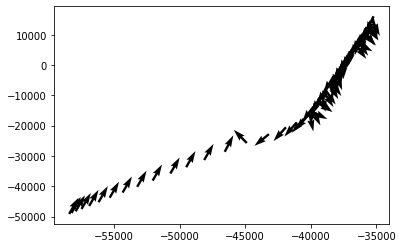

In [11]:
#plt.scatter(df["loc.x"], df["loc.y"])
#plt.axis('square')
sample = df.iloc[::50]
plt.quiver(sample["loc.x"], sample["loc.y"], sample["angle.x"], sample["angle.y"])#, scale=100)
#center = (0,2500)
#radius = 10000
#plt.xlim(center[0]-radius,center[0]+radius)
#plt.ylim(center[1]-radius,center[1]+radius)

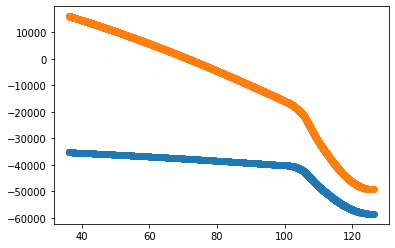

In [12]:
plt.scatter(df["ts"], df["loc.x"])
plt.scatter(df["ts"], df["loc.y"])

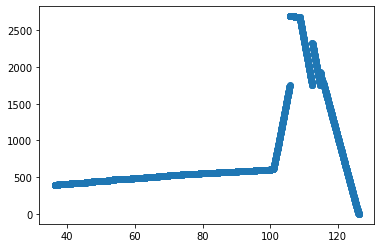

In [13]:
plt.scatter(df["ts"], df["speed"])

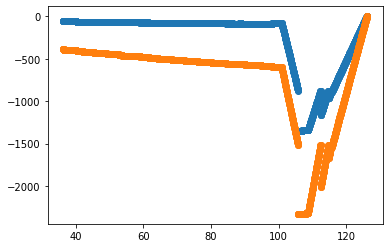

In [14]:
plt.scatter(df["ts"], df["v.x"])
plt.scatter(df["ts"], df["v.y"])

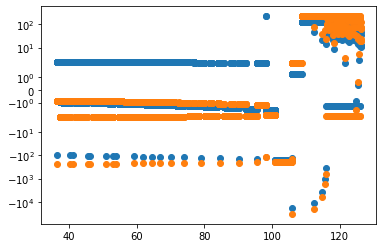

In [15]:
pd.DataFrame({
    "v":df["v.x"],
    "dv":(df["v.x"].shift(1) - df["v.x"]),
    "a":(df["v.x"].shift(1) - df["v.x"]) / (df["ts"].shift(1) - df["ts"]),
})
#plt.scatter(df["ts"], (df["v.x"] - df["v.x"].shift(-1)))#/(df["ts"]-df["ts"].shift(-1)))
plt.scatter(df["ts"], (df["v.x"].shift(1) - df["v.x"]) / (df["ts"].shift(1) - df["ts"]))
plt.scatter(df["ts"], (df["v.y"].shift(1) - df["v.y"]) / (df["ts"].shift(1) - df["ts"]))
plt.yscale("symlog")

(0.0, 0.03000000000000682)

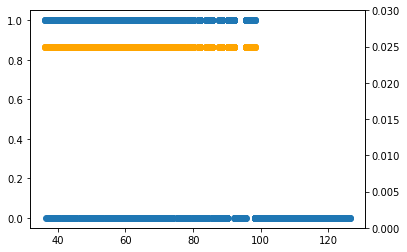

In [16]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.scatter(df["ts"], 1-df["o.ct"].isna().astype(int))
ax2.scatter(df["ts"], df["ts"] - df["o.ct_ts"], color="orange")

ax2.set_ylim(0,(df["ts"] - df["o.ct_ts"]).max()*1.2)

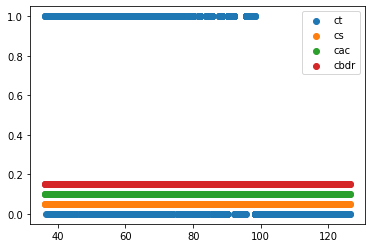

In [17]:
plt.scatter(df["ts"], (~(df["o.ct"].isna())).astype(int), label="ct")
plt.scatter(df["ts"], df["o.cs"].fillna(0).astype(int)+0.05, label="cs")
plt.scatter(df["ts"], df["o.cac"].fillna(0).astype(int)+0.1, label="cac")
plt.scatter(df["ts"], df["o.cbdr"].fillna(0).astype(int)+0.15, label="cbdr")
plt.legend()

(0.0, 34586.98780697944)

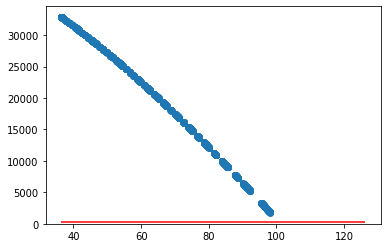

In [18]:
plt.scatter(df["ts"], df["o_ct_dist"])
plt.hlines(300, df["ts"].min(), df["ts"].max(), color="red")
plt.ylim(0)

In [19]:
df.groupby("o.ct")["ts"].describe()

,count,mean,std,min,25%,50%,75%,max
o.ct,,,,,,,,
2271d9a4-9898-42df-8e61-77381643693c,1106.0,68.184727,18.332449,36.291667,53.097917,67.429167,84.485417,98.191667


In [20]:
df.groupby("o.ct")["o_ct_dist"].describe()

,count,mean,std,min,25%,50%,75%,max
o.ct,,,,,,,,
2271d9a4-9898-42df-8e61-77381643693c,1106.0,17872.30384,9339.863852,1788.999008,9636.284074,18802.315509,25770.258632,32954.274102


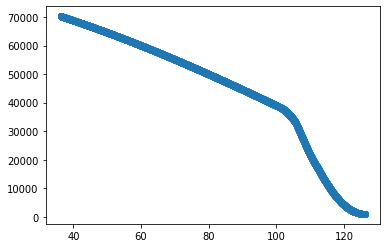

In [21]:
plt.scatter(df["ts"], df["o_t_dist"])
#plt.ylim(900)
#plt.xlim(18)

In [22]:
df.groupby(["o.t_loc.x", "o.t_loc.y"])["ts"].describe().sort_values(["min"])

,,count,mean,std,min,25%,50%,75%,max
o.t_loc.x,o.t_loc.y,,,,,,,,
-58968.880944,-50074.220996,3600.0,81.279167,25.98437,36.291667,58.785417,81.279167,103.772917,126.266667


In [23]:
import ipywidgets
def plot_collision_chart(max_time):
    sample = df[df["ts"] < max_time].iloc[::100]
    plt.quiver(sample["loc.x"], sample["loc.y"], sample["v.x"], sample["v.y"])
    plt.scatter(sample["o.ct_loc.x"], sample["o.ct_loc.y"])
    plt.scatter(sample["o.t_loc.x"], sample["o.t_loc.y"])
    #plt.axis('square')
    center = (-33555, -5000)
    radius = 15000
    plt.xlim(center[0]-radius,center[0]+radius)
    plt.ylim(center[1]-radius,center[1]+radius)

    plt.gca().get_xlim()[1]-plt.gca().get_xlim()[0], plt.gca().get_ylim()[1]-plt.gca().get_ylim()[0]
    plt.show()
    
ipywidgets.interact(plot_collision_chart, max_time=ipywidgets.FloatSlider(value=df["ts"].max(), min=df["ts"].min(), max=df["ts"].max(), continuous_update=False))


interactive(children=(FloatSlider(value=126.26666666667826, continuous_update=False, description='max_time', m…

<function __main__.plot_collision_chart(max_time)>

In [24]:
df["v.x"].describe()

count    3.600000e+03
mean    -2.580217e+02
std      3.604533e+02
min     -1.347692e+03
25%     -1.779062e+02
50%     -8.223757e+01
75%     -7.212279e+01
max     -1.110223e-16
Name: v.x, dtype: float64

In [25]:
df["v.y"].describe()

count    3600.000000
mean     -725.032747
std       502.485302
min     -2328.925872
25%      -598.106545
50%      -535.453613
75%      -465.904943
max         0.000000
Name: v.y, dtype: float64